In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd

from matplotlib import colors
from sklearn.cluster import KMeans
from sklearn import svm
from skimage.color import rgb2gray, rgb2hsv, hsv2rgb
from mpl_toolkits.mplot3d import Axes3D

In [2]:
img = plt.imread('flask_app/static/user_input/user_image.jpg')

classes = None
with open('coco.names', 'r') as f:
    classes = [line.strip() for line in f.readlines()]


Width = img.shape[1]
Height = img.shape[0]

In [4]:
# read pre-trained model and config file
net = cv2.dnn.readNet('yolov3.weights', 'yolov3.cfg')

In [5]:
# create input blob 
# set input blob for the network
net.setInput(cv2.dnn.blobFromImage(img, 0.00392, (416,416), (0,0,0), True, crop=False))

# run inference through the network
# and gather predictions from output layers

layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]
outs = net.forward(output_layers)

In [6]:
class_ids = []
confidences = []
boxes = []


In [6]:
# #First I identified the range for the three colors.
# color_list=["yellow","red","black"]
# boundaries = [
#     ((181,166,66), (255,255,240)), #yellow
#     ((130, 45, 45), (50, 56, 200)), #red
#     ((0,0,0),(20,20,20)) #black
#     ]
# mask=[]
# #Then I applied OpenCV’s inRange function to create masks for three colors.
# for i in range(len(color_list)):
#     lower=boundaries[i][0]
#     upper=boundaries[i][1]
#    # mask.append(cv2.inRange(image, lower, upper))


#     if i==1:
#         lower = np.array([155,25,0])
#         upper = np.array([179,255,255]) 
#     #     # lower mask (0-10)
#     #     lower_red = np.array([0,50,50])
#     #     upper_red = np.array([10,255,255])
#     #     mask0 = cv2.inRange(image, lower_red, upper_red)

#     #     # upper mask (170-180)
#     #     lower_red = np.array([160,50,50])
#     #     upper_red = np.array([180,255,255])
#     #     mask1 = cv2.inRange(image, lower_red, upper_red)

#     #     # join my masks
#     #     mask = mask0+mask1
#     mask=cv2.inRange(image, lower, upper)
#     output = cv2.bitwise_and(image, image, mask = mask)
#     fig = plt.figure(figsize=(20,10))
#     ax1 = fig.add_subplot(1,1,1)
#     ax1.imshow(output)
#     plt.title(f"{color_list[i]}")
    

In [7]:
# #Then use bitwise_and to apply masks to the frame.
# output = cv2.bitwise_and(image, image, mask = mask)
# #Three colors are extracted now

In [8]:
# #Now we need to apply these mask to the detection.
# # I cropped the image based on the bounding box detected then applied the masks.
# crop_img = frame[ymin:ymax, xmin:xmax]

In [7]:
#create bounding box 
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.1:
            center_x = int(detection[0] * Width)
            center_y = int(detection[1] * Height)
            w = int(detection[2] * Width)
            h = int(detection[3] * Height)
            x = center_x - w / 2
            y = center_y - h / 2
            class_ids.append(class_id)
            confidences.append(float(confidence))
            boxes.append([x, y, w, h])

In [8]:
indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.1, 0.1)
print("==>> indices.shape: ", indices.shape)

==>> indices.shape:  (2,)


In [9]:
#check if is people detection
player_number=0
u_im=[] # player postion
boxes_player=[]
for i in indices:
    box = boxes[i]
    if class_ids[i]==0:
        boxes_player.append(box)

        label = str(f"player{player_number}") 
        player_number +=1
        cv2.rectangle(img, (round(box[0]),round(box[1])), (round(box[0]+box[2]),round(box[1]+box[3])), (0, 0, 0), 2)
        cv2.putText(img, label, (round(box[0])-10,round(box[1])-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)
        bottom_right_corner=(round(box[0]+box[2]),round(box[1]+box[3]))
        u_im.append(bottom_right_corner)

Text(0.5, 1.0, 'detection')

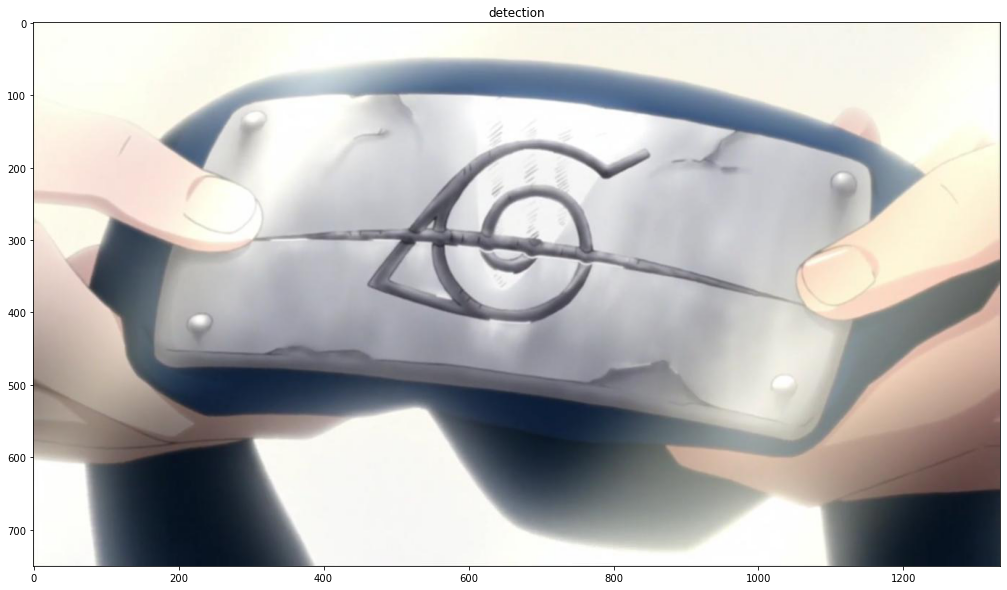

In [10]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(1,1,1)
ax1.imshow(img)
plt.title("detection")
#

import the coordinates of the players to the calibration script

In [12]:
import csv
with open('GFG.csv', 'w',newline='') as outfile:
    writer = csv.writer(outfile)
    #writer.writerow(["",""])
    writer.writerows(u_im)

In [20]:
import csv
list=[1,2,3,4,5]
list2=[6,7,8,9,10]
with open('list.txt', 'a',newline='') as outfile:
    writer = csv.writer(outfile)
    #writer.writerow(["",""])
    writer.writerow(list)
#n= nombre d'images

with open('list.txt', 'a',newline='') as outfile:
    writer = csv.writer(outfile)
    #writer.writerow(["",""])
    for i in range(n-1):
        for j in range(len(list2)):
            writer.writerow(list2[j])

In [ ]:
l=[]

This calibration works only for this photo, but i will make it work for other photos.

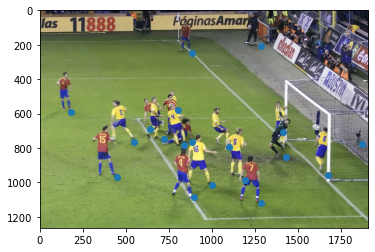

ValueError: shapes (3,3) and (19,2) not aligned: 3 (dim 1) != 19 (dim 0)

In [13]:
%run ./calibration.py 

### Team classification

In [56]:
p=4 # player number

To classify the players, we need to make clusters of players.  
we will use the k-means algorithm on the cropped images of the players.

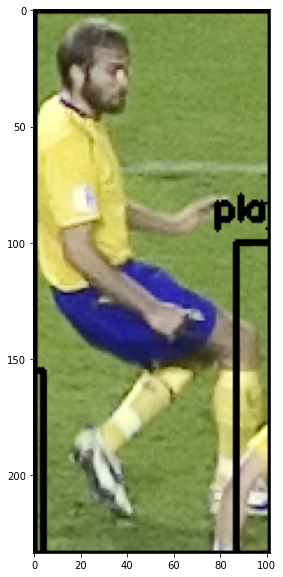

In [143]:
def get_cropped_box(box:list) -> list:
    """crop the image based on the bounding box

    Args:
        box (list): list of the box boundary of the player

    Returns:
        list: return the cropped image as list
    """
    player_crop=img[round(box[1]):round(box[1]+box[3]),round(box[0]):round(box[0]+box[2])]
    return player_crop
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(1,1,1)
ax1.imshow(get_cropped_box(boxes_player[p]))

In [58]:
def image_to_pandas(image:list) -> pd.DataFrame:
    """convert the image to pandas dataframe

    Args:
        image (list): image as list

    Returns:
        pd.DataFrame: return the image as pandas dataframe
    """
    df = pd.DataFrame([image[:,:,0].flatten(),
                       image[:,:,1].flatten(),
                       image[:,:,2].flatten()]).T
    df.columns = ['Red_Channel','Green_Channel','Blue_Channel']
    return df
df_player = image_to_pandas(get_cropped_box(boxes_player[p]))
df_player.head(5)

Red_Channel  Green_Channel  Blue_Channel
0            0              0             0
1            0              0             0
2            0              0             0
3            0              0             0
4            0              0             0

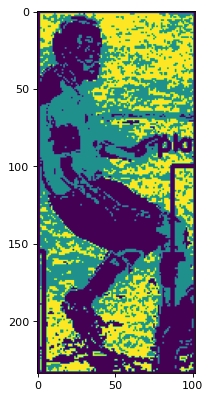

In [71]:
plt.figure(num=None, figsize=(8, 6), dpi=80)
kmeans = KMeans(n_clusters=  3,random_state=42).fit(df_player)
result = kmeans.labels_.reshape(get_cropped_box(boxes_player[p]).shape[0],get_cropped_box(boxes_player[p]).shape[1])
plt.imshow(result, cmap='viridis')
plt.show()

We then define the k-means algorithm as follows:


In [156]:
nbr_cluster=3

In [157]:
def get_clusters(box: list) -> list:
    """get the clusters of the image

    Args:
        box (list): list of the box boundary

    Returns:
        list: k-means,center of the clusters,and result masks
    """
    # box=get_cropped_box(box)
    # image = Image.fromarray(box,'RGB')
    # pixels = np.array(list(image.getdata()))
    # #fit KMeans and get centroids
    # kmeans = KMeans(n_clusters = 2)
    # kmeans = kmeans.fit(pixels)
    # centroids = kmeans.cluster_centers_
    # return kmeans, centroids
    box=get_cropped_box(box)
    image = Image.fromarray(box,'RGB')
    pixels = np.array(list(image.getdata()))
    kmeans = KMeans(n_clusters=  nbr_cluster,random_state=42).fit(image_to_pandas(box))
    result = kmeans.labels_.reshape(np.shape(image)[0],np.shape(image)[1])
    centroids = kmeans.cluster_centers_
    return kmeans, centroids,result

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1
2
3


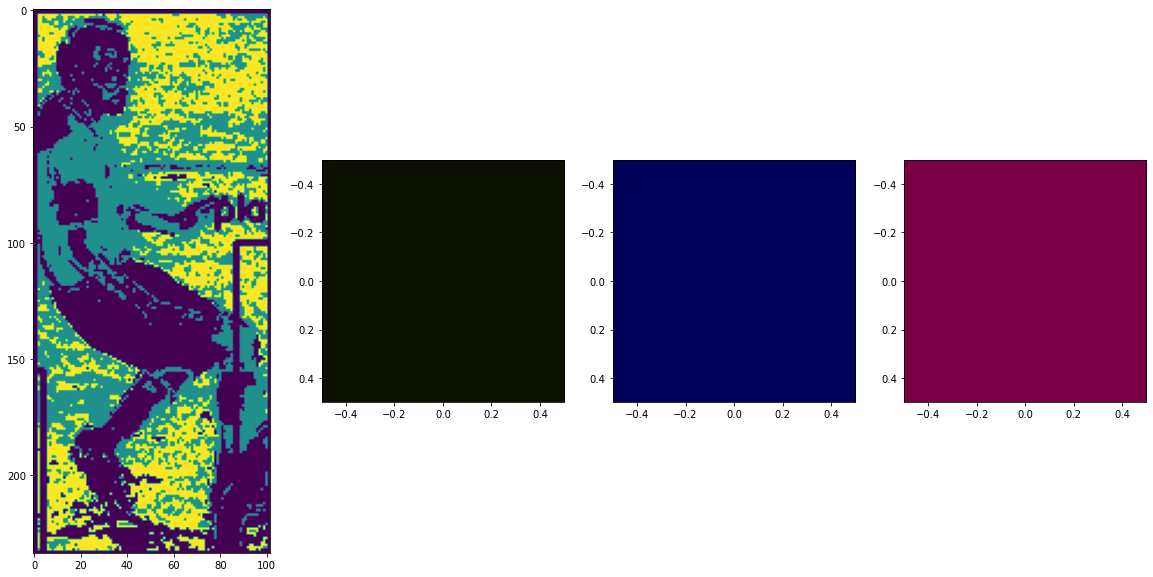

In [166]:
def show_clusters(i):
    clusters=get_clusters(boxes_player[i])[1]
    result=get_clusters(boxes_player[i])[2]

    fig = plt.figure(figsize=(20,10))
    axis=[fig.add_subplot(1,nbr_cluster+1,k) for k in range(1,nbr_cluster+2)]
    
    #ax.append(fig.add_subplot(1,nbr_cluster,1))
    axis[0].imshow(result,cmap='viridis')
    for j in range(1,nbr_cluster+1):
        #axis.append(plt.add_subplot(1,nbr_cluster+1,j+1))
        axis[j].imshow([[(int(clusters[j-1,0]), int(clusters[j-1,1]), int(clusters[j-1,2]))]])
        print(j)
        #ax[j].title(f"cluster {j}")
    # fig = plt.figure(figsize=(20,10))
    # ax1 = fig.add_subplot(1,nbr_cluster+1,1)
    # ax1.imshow([[(int(clusters[0,0]), int(clusters[0,1]), int(clusters[0,2]))]])
    # ax2 = fig.add_subplot(1,2,2)
    # ax2.imshow([[(int(clusters[1,0]), int(clusters[1,1]), int(clusters[1,2]))]])
show_clusters(p)

show clusters of all players

In [13]:
import numpy as np
arr = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
np.delete(arr, 3, 1)


array([[ 1,  2,  3],
       [ 5,  6,  7],
       [ 9, 10, 11]])

the dominant colors of image 0 [[ -8.06439042 -87.98299004  87.17857364]
 [ 81.39395447 100.52531409  71.47854211]
 [-11.73974015 -15.69694782 -72.5433079 ]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1
2
3
the dominant colors of image 1 [[ 117.97964971 -116.42035029   71.96847373]
 [   8.83068032   58.46633884    4.37503802]
 [ -98.03140049  -89.31420278   27.17323042]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1
2
3
the dominant colors of image 2 [[ -81.58877576  -74.27265955   86.34897773]
 [  38.39880755   40.39014022  -21.70972728]
 [ 119.05929944 -117.04642824   72.46887929]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1
2
3
the dominant colors of image 3 [[  16.63504664   17.63762651  -80.69180393]
 [-114.62243667  -67.37449282   90.34016888]
 [ 110.1639136     3.94515036   75.79944939]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1
2
3
the dominant colors of image 4 [[  11.48900043   16.14085861  -18.34803503]
 [-101.28823746  -89.70060101   89.33055317]
 [ 121.21492678 -111.3065659    70.81498977]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1
2
3
the dominant colors of image 5 [[ -75.23287958   -0.88307155   26.23769634]
 [  77.95037623   83.97710171   25.86721588]
 [ 115.47128044 -117.33927531   69.33379937]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1
2
3
the dominant colors of image 6 [[  57.85816662  -25.53792177   86.40101523]
 [-110.00581862  -89.16392456   89.07303371]
 [ -19.75018487  -20.15195958  -80.33448361]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1
2
3
the dominant colors of image 7 [[-111.26317576  -94.63267879   89.6256    ]
 [  -7.43606752   44.97718816    3.31160006]
 [ 120.48336252 -113.74365149   70.72197898]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1
2
3
the dominant colors of image 8 [[  51.3284944    61.96356975   43.1880271 ]
 [ -89.36414613  -81.51537808   -0.48988955]
 [ 121.06321205 -114.97978684   71.96876148]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1
2
3
the dominant colors of image 9 [[ 84.54981791  30.21402559  66.27248109]
 [-80.65106425 -59.75571541  88.26162791]
 [ -4.18363685  -6.99757782 -71.30698843]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1
2
3


C:\Users\HAMZAO~1\AppData\Local\Temp/ipykernel_23396/3652664652.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(20,10))


the dominant colors of image 10 [[  75.7133753    73.06955153   63.55334382]
 [ -38.27866155  -22.63302249   58.88206253]
 [ -63.51816284  -72.75741127 -104.84384134]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1
2
3
the dominant colors of image 11 [[-24.55355404 -25.65345667 -70.41217137]
 [ 77.84698026  92.13603368  65.56736353]
 [ 14.77774541 -89.26711331  91.23143024]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1
2
3
the dominant colors of image 12 [[-100.09844498  -77.79796651   90.80645933]
 [ -17.48862257  -19.69781553  -63.41064927]
 [  86.49333144   16.98566969   72.79866629]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1
2
3
the dominant colors of image 13 [[ 90.02705855  83.20958712  74.80685794]
 [-72.54599603 -76.58570483 -94.21575116]
 [ 10.95874699  25.8726747   43.97368675]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1
2
3
the dominant colors of image 14 [[  81.32018993   73.89492155   58.07720892]
 [  11.7285264   -35.29590229  -15.13041765]
 [-106.17632027  -63.80664395   98.43526405]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1
2
3
the dominant colors of image 15 [[-42.44301383 -56.17262756 -95.28564616]
 [ 40.42292392  55.24714073  34.93535554]
 [-17.29511867 -85.06403941  97.74339454]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1
2
3
the dominant colors of image 16 [[ -99.2478941   -92.85078219   90.23906939]
 [   9.30227743   34.96480331   40.92215321]
 [ -59.18838028  -76.68838028 -102.06807512]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1
2
3
the dominant colors of image 17 [[ -76.52537527  -80.43817012 -105.00214439]
 [-112.50315105  -62.57755641   87.19089246]
 [  61.23651146  -19.4556541    35.29120473]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1
2
3
the dominant colors of image 18 [[  65.80719083   65.40102726   74.12406164]
 [-114.923674   -107.46442432 -109.28201811]
 [ 123.25        122.55263158 -124.69407895]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1
2
3
(19, 3, 3)


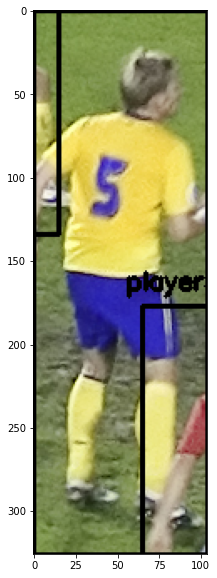

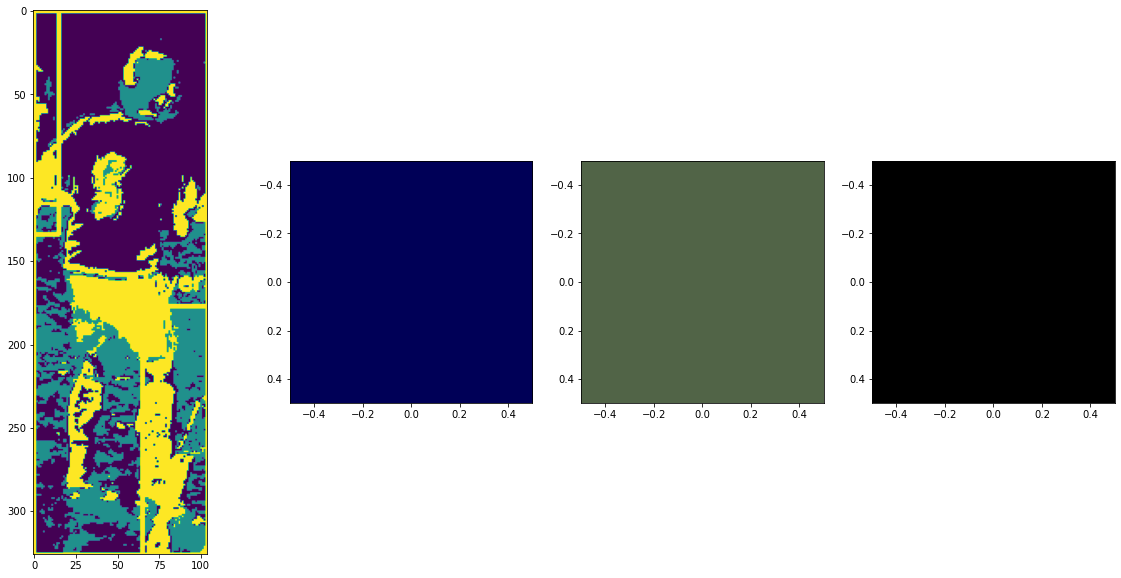

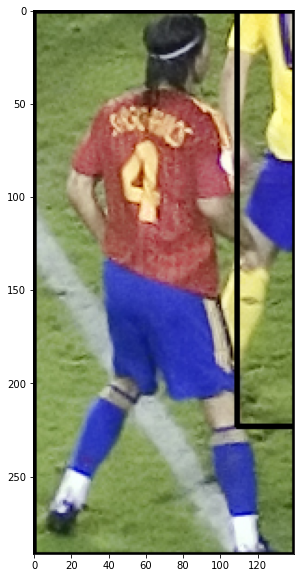

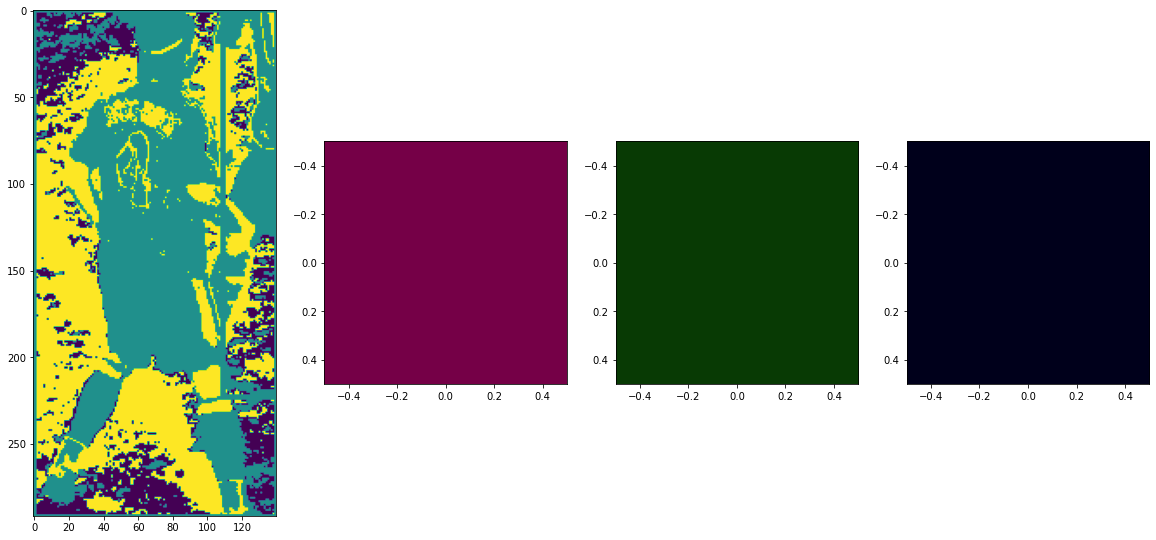

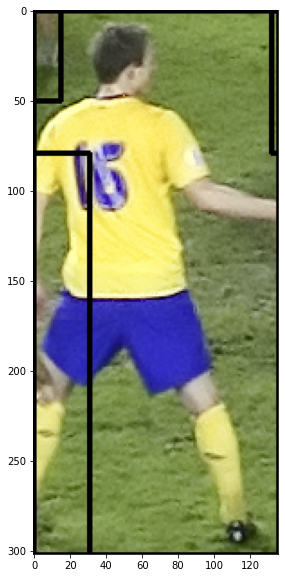

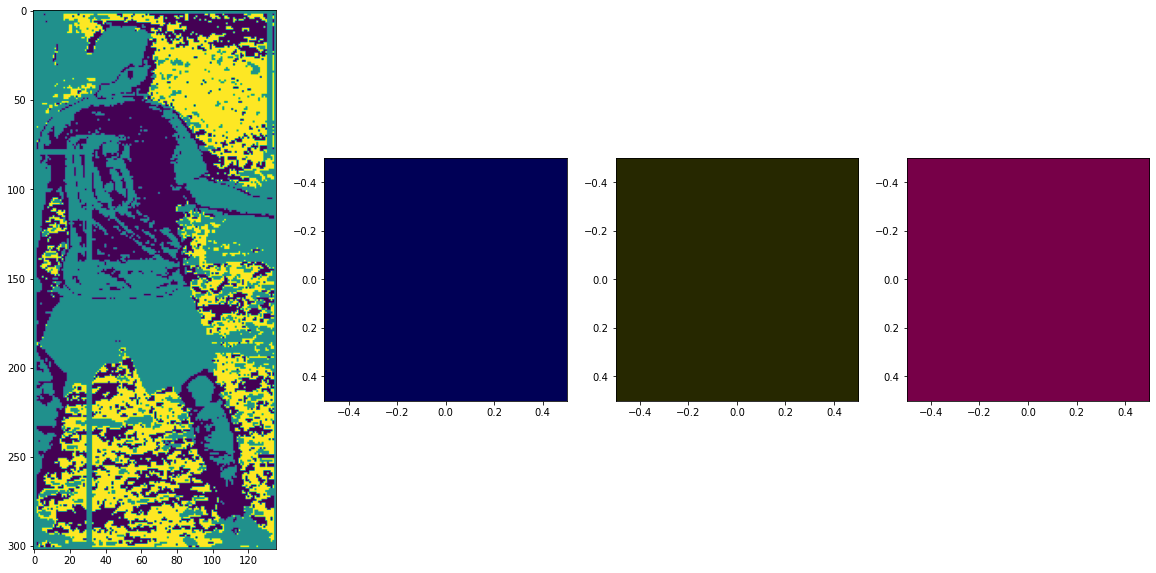

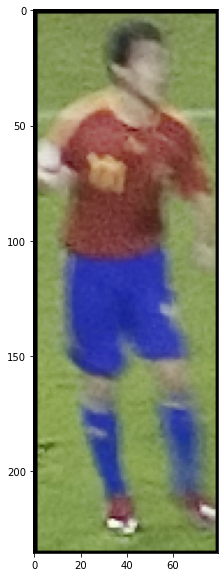

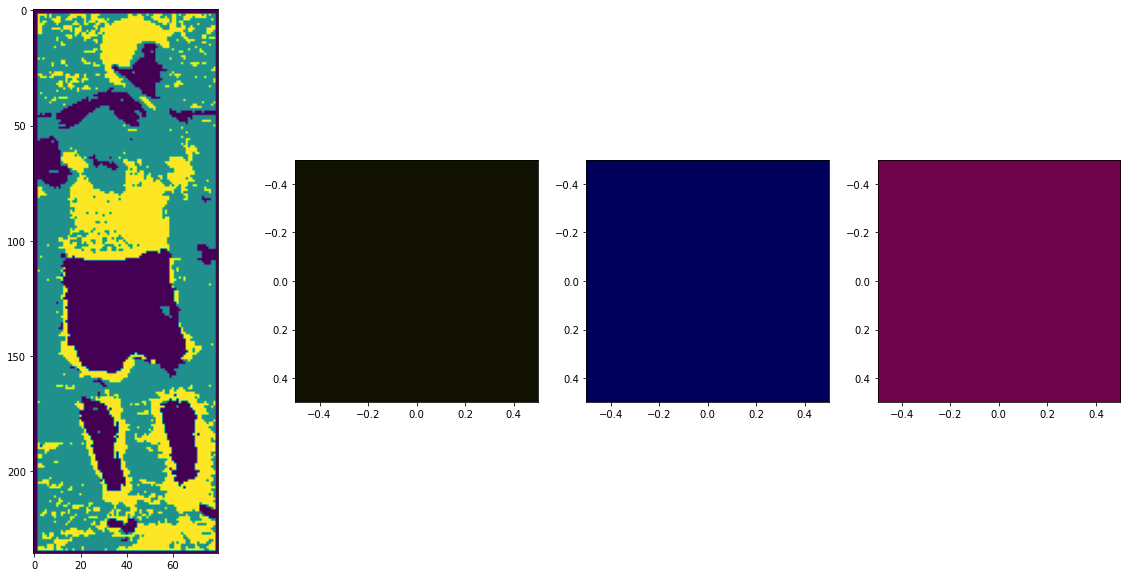

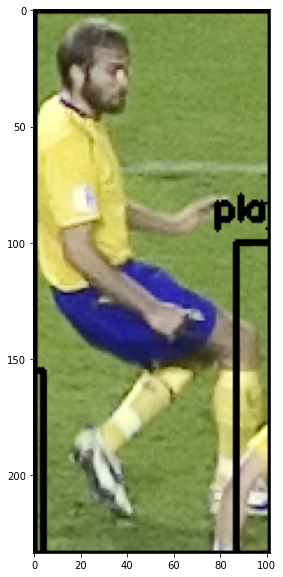

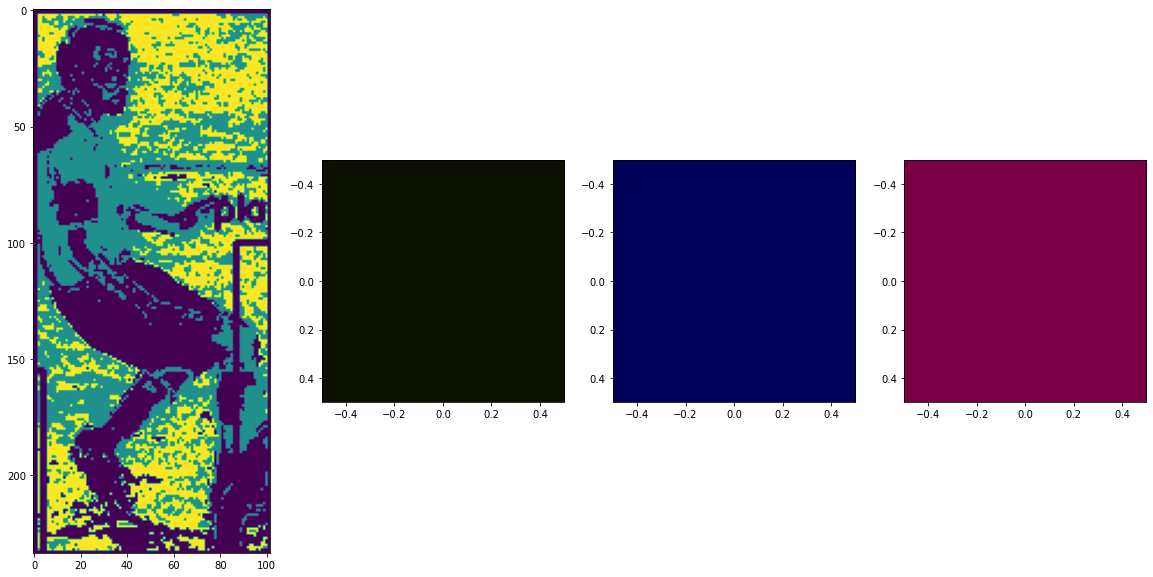

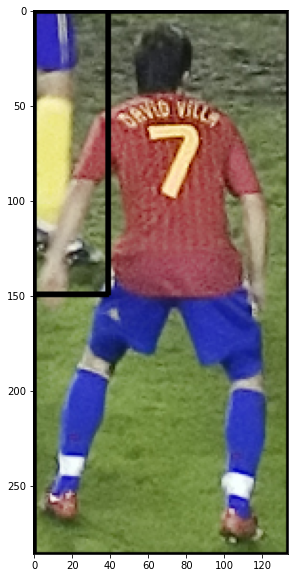

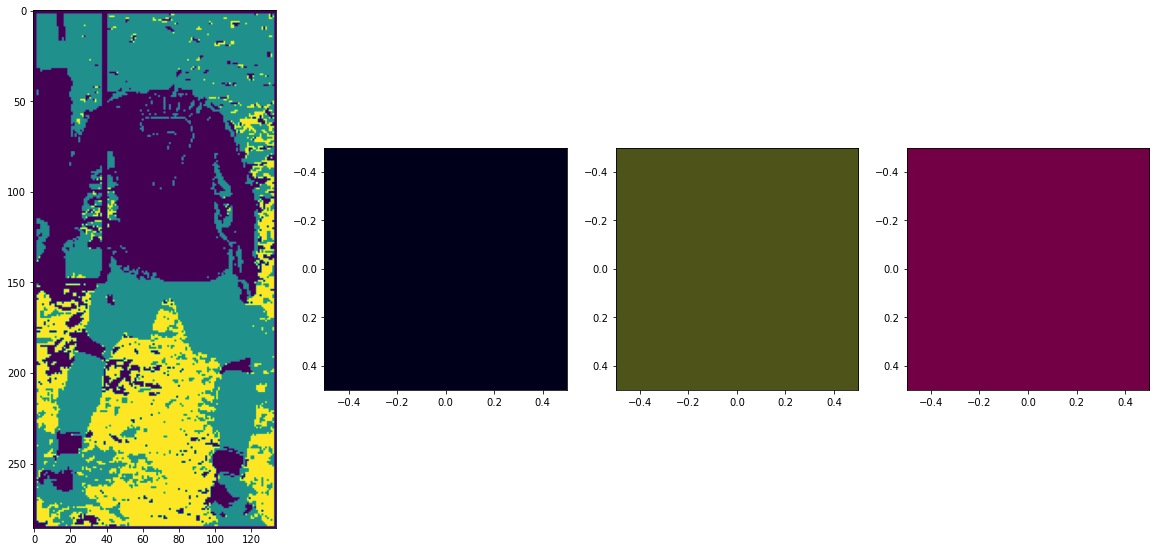

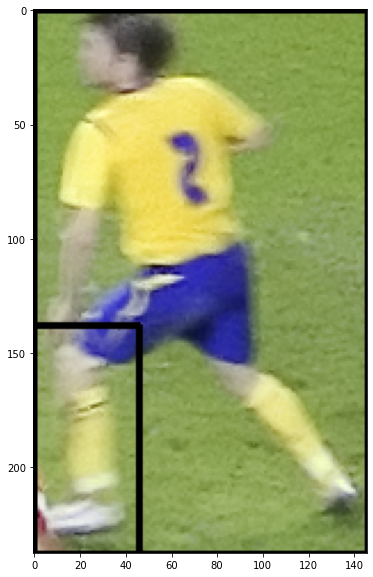

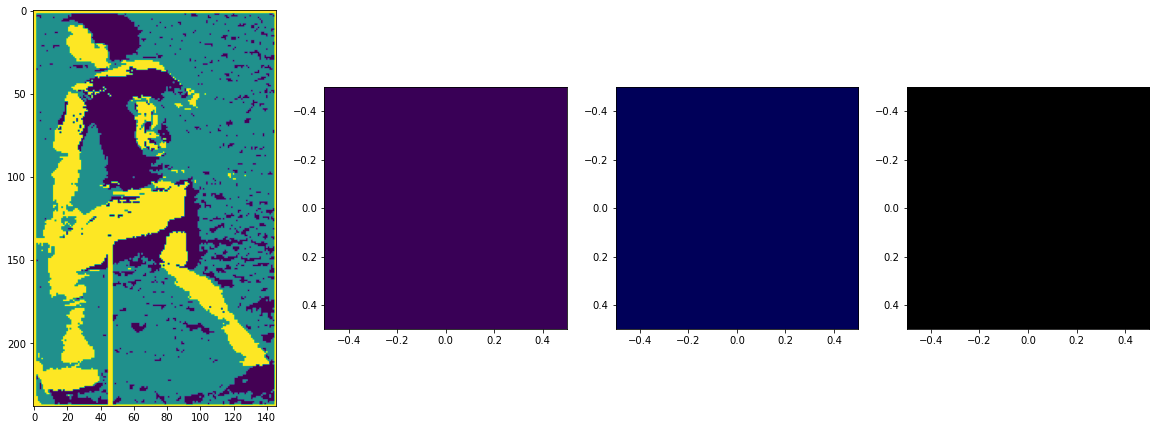

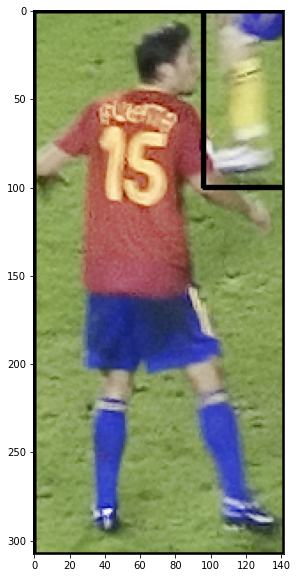

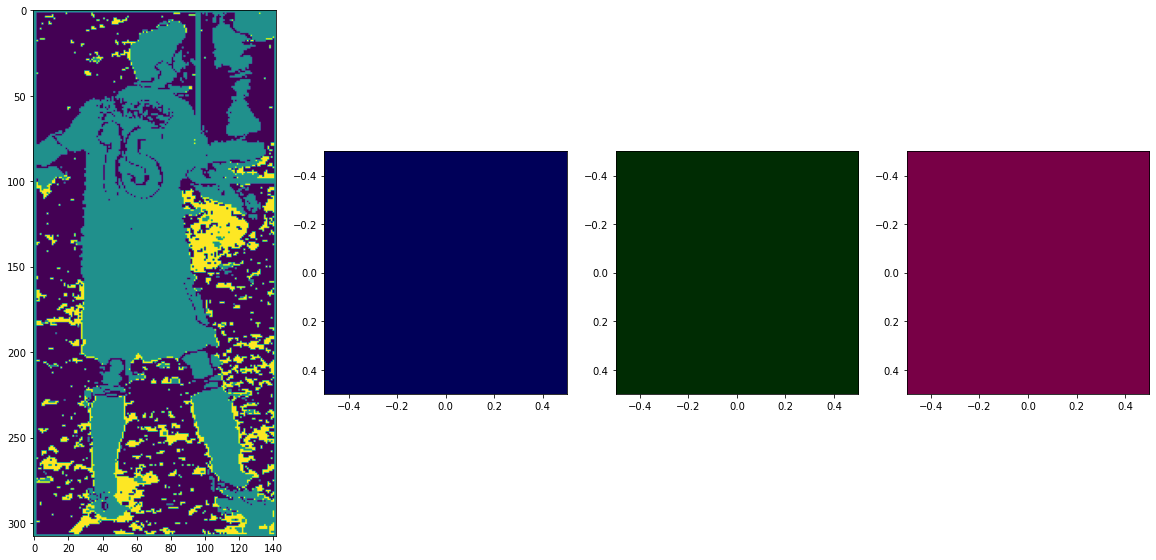

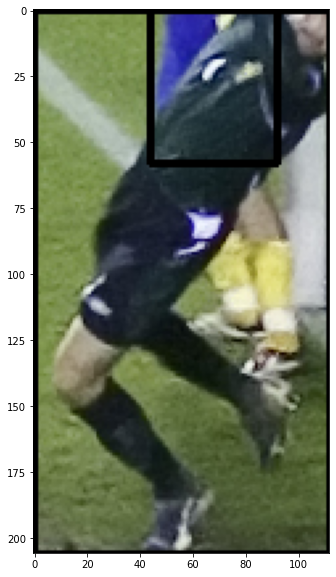

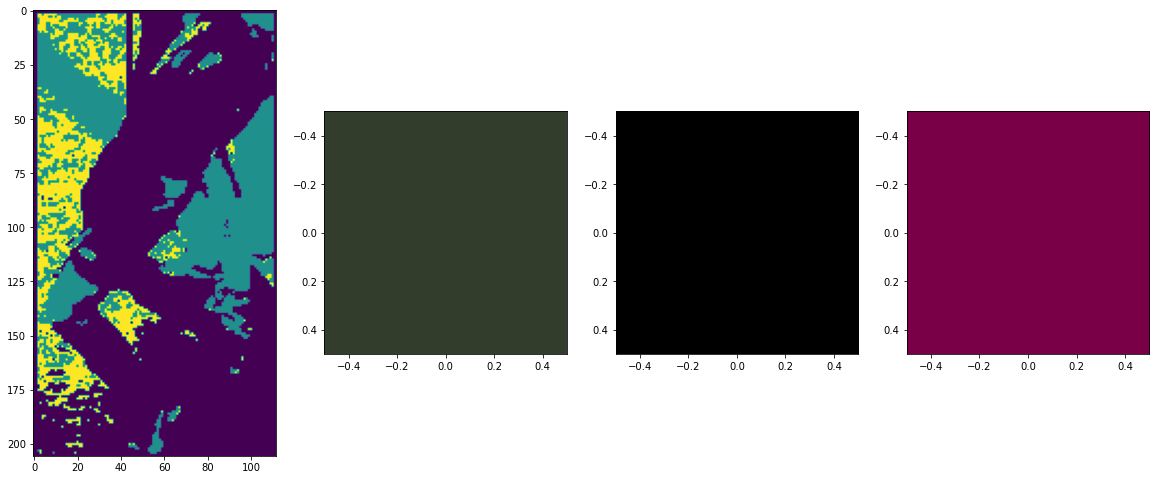

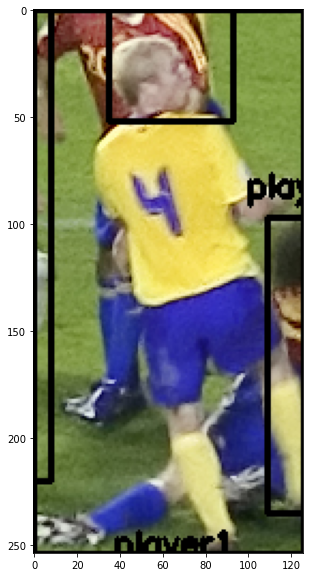

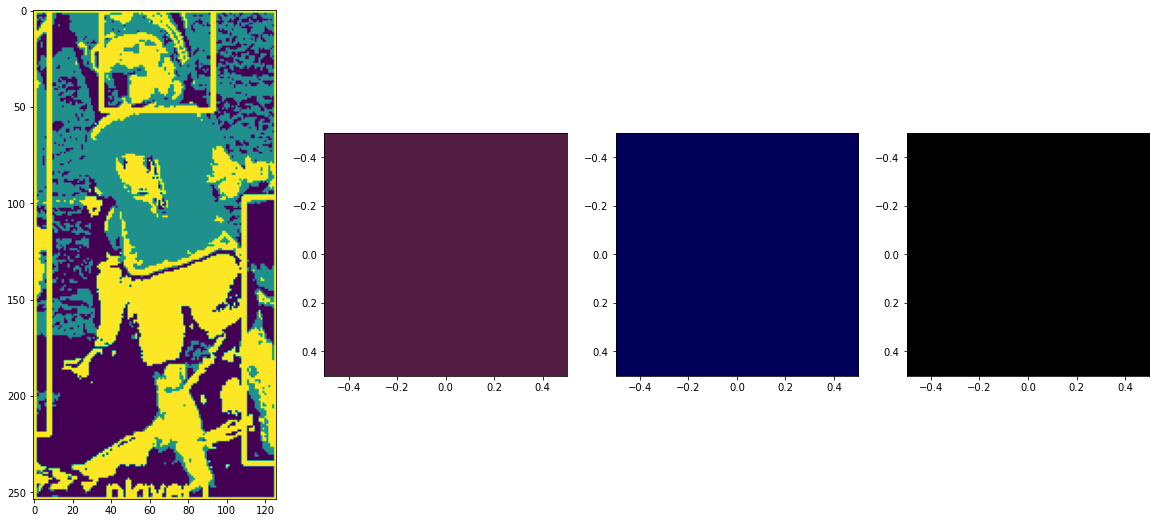

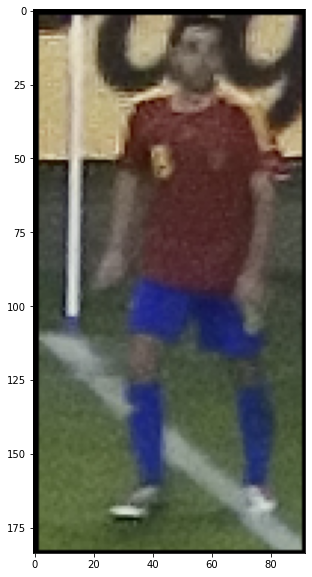

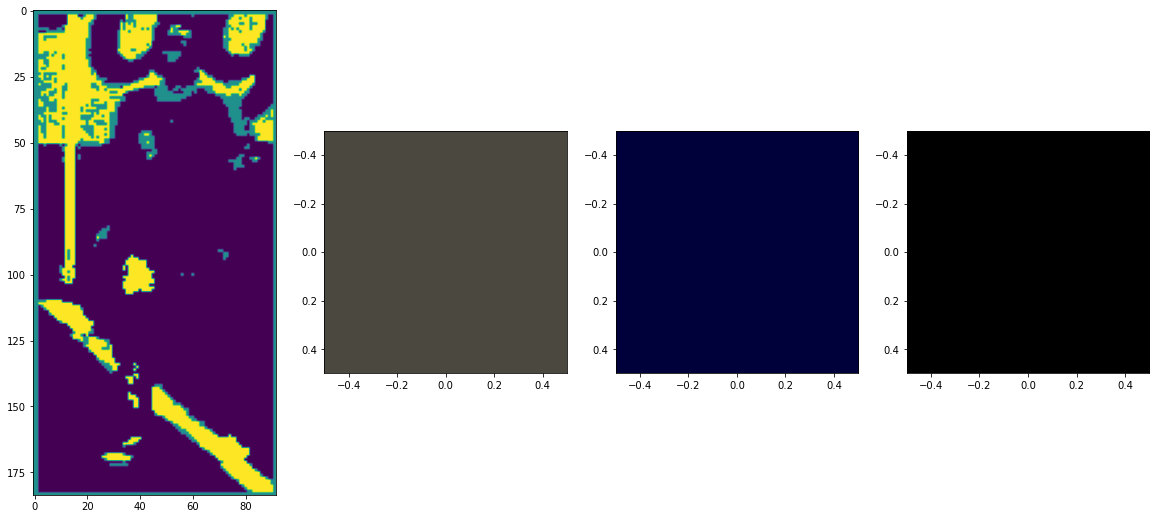

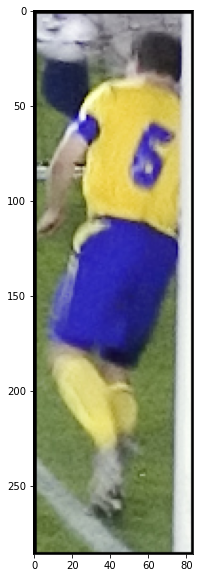

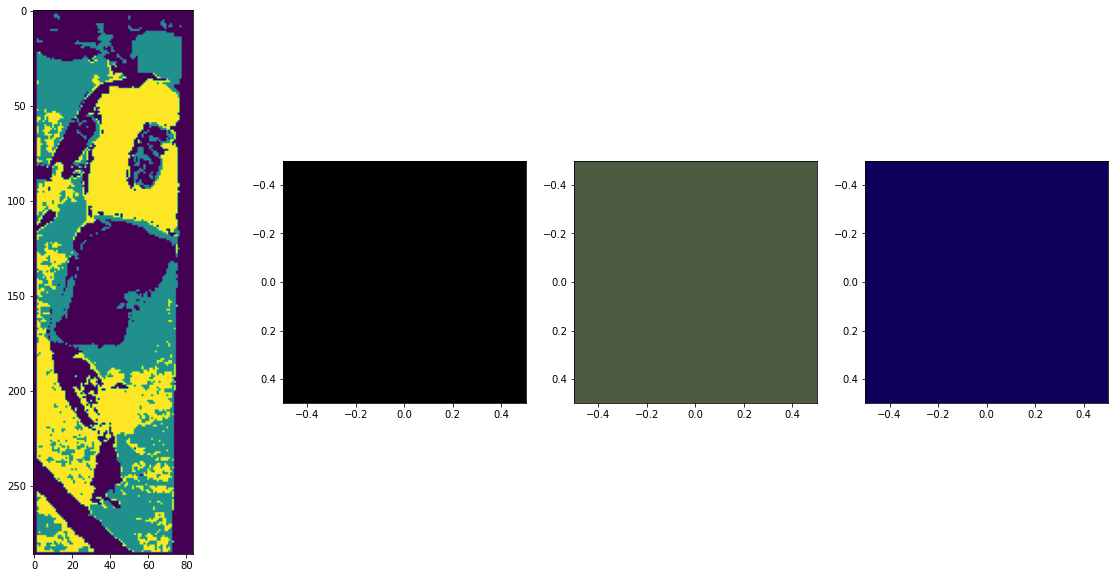

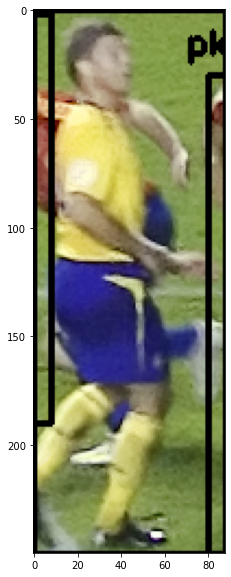

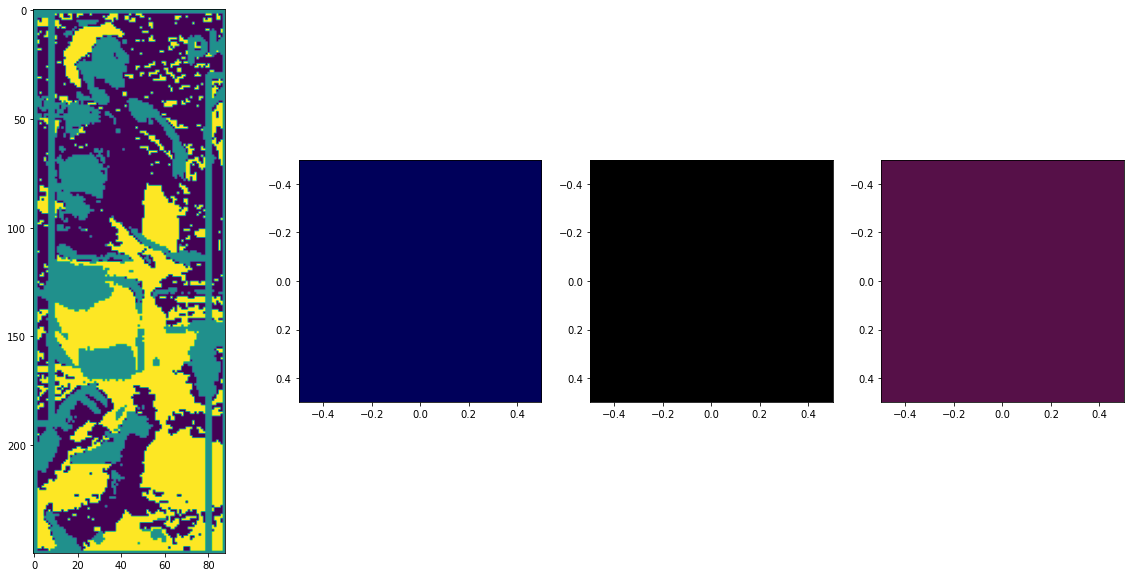

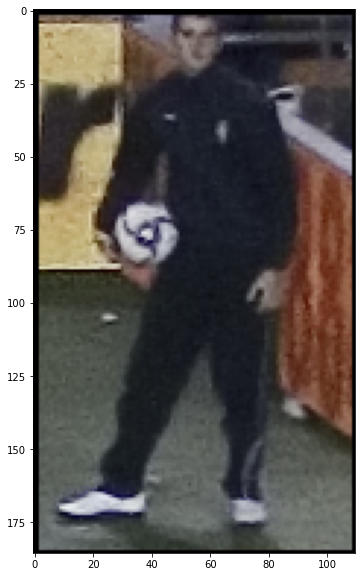

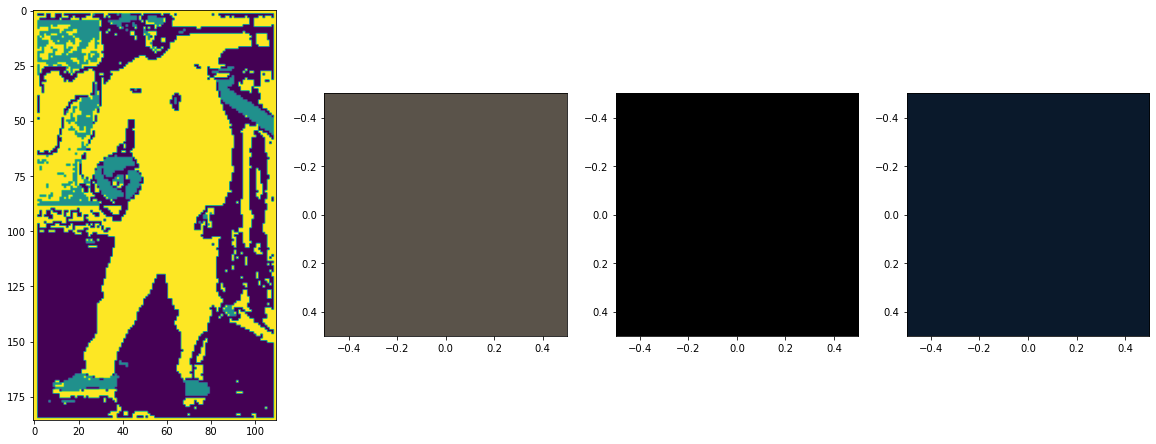

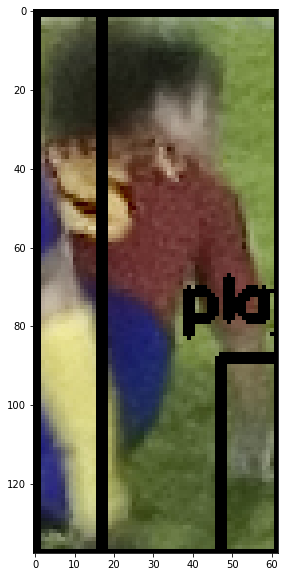

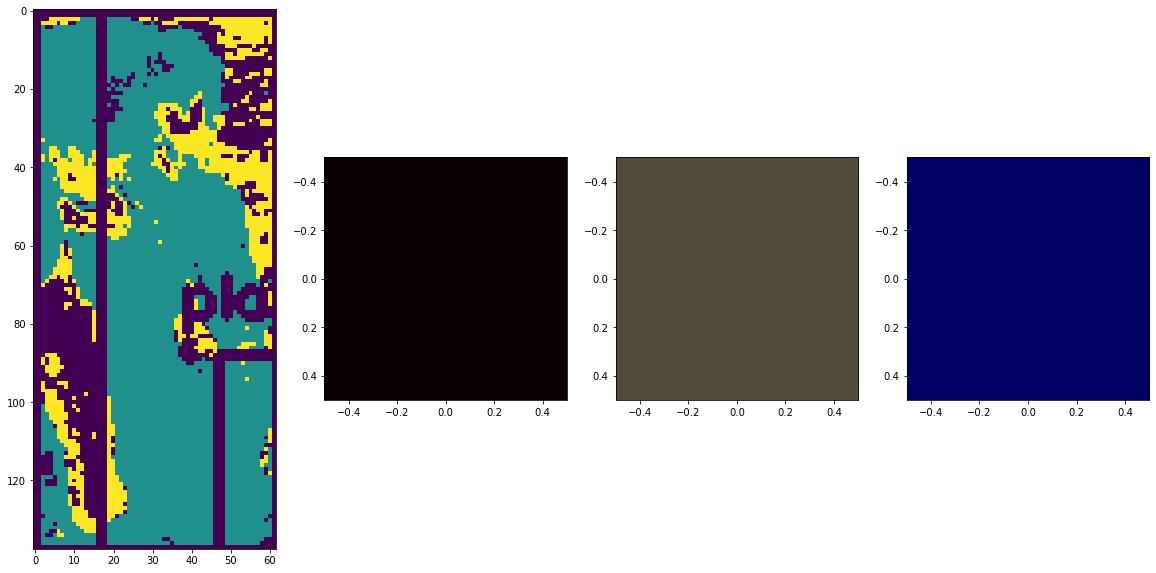

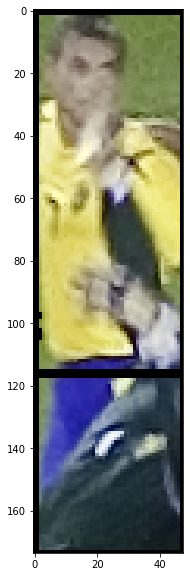

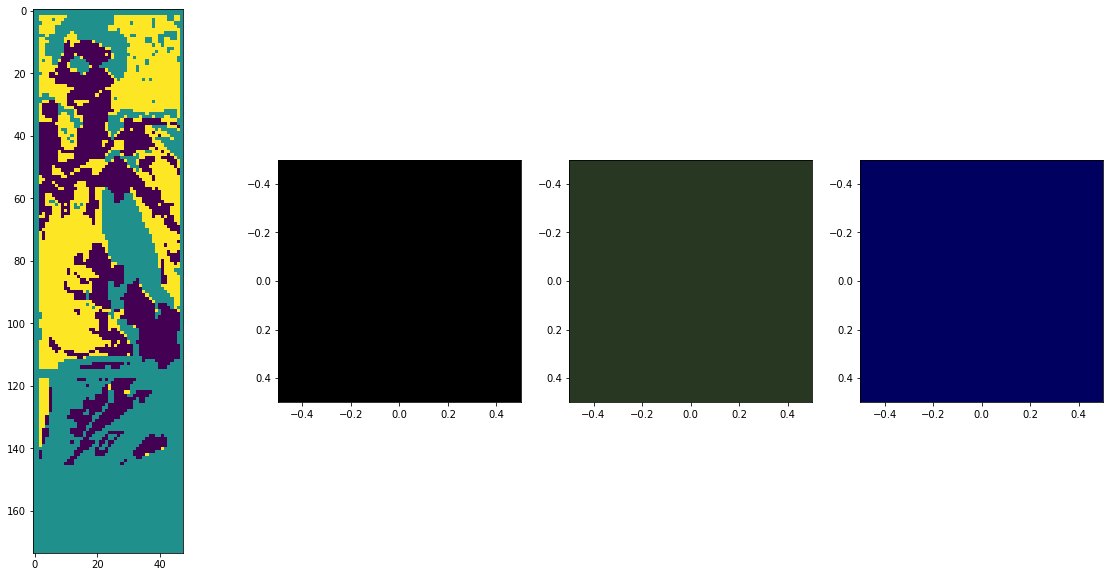

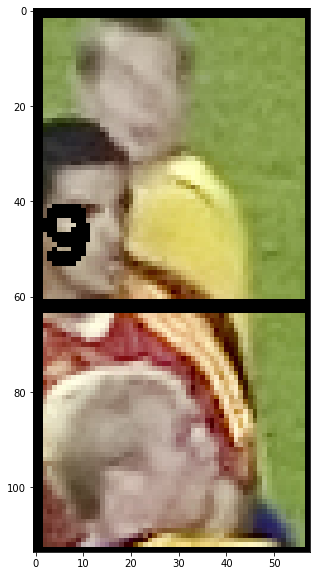

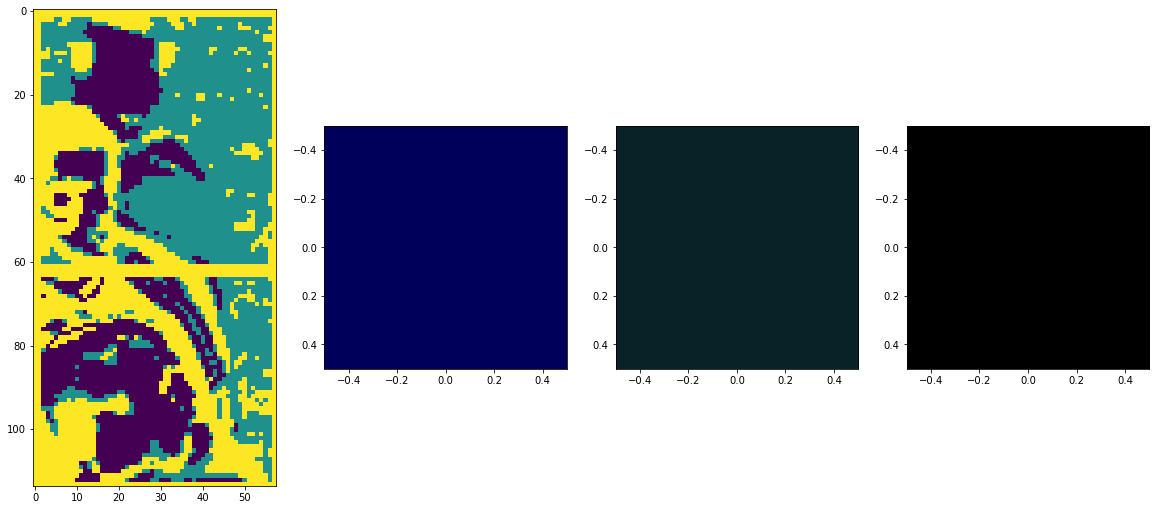

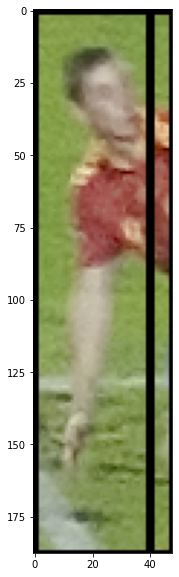

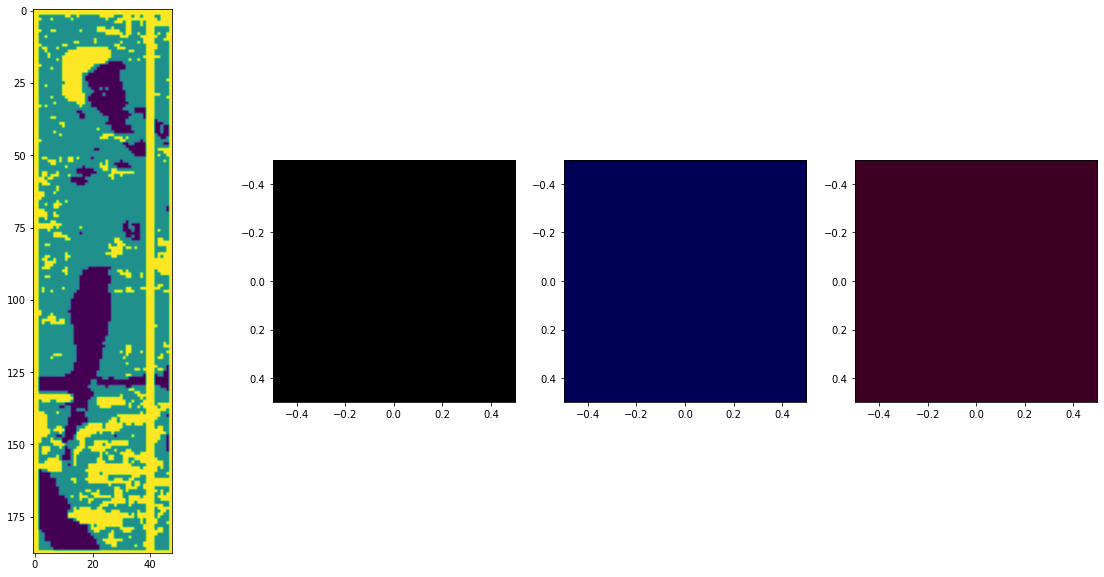

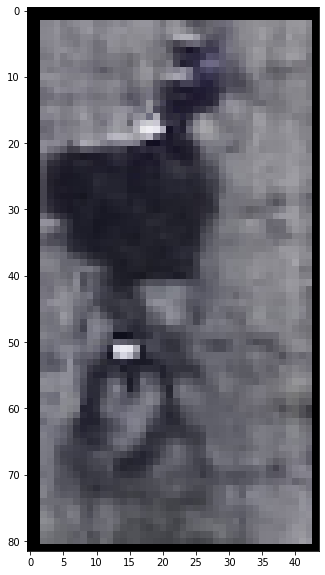

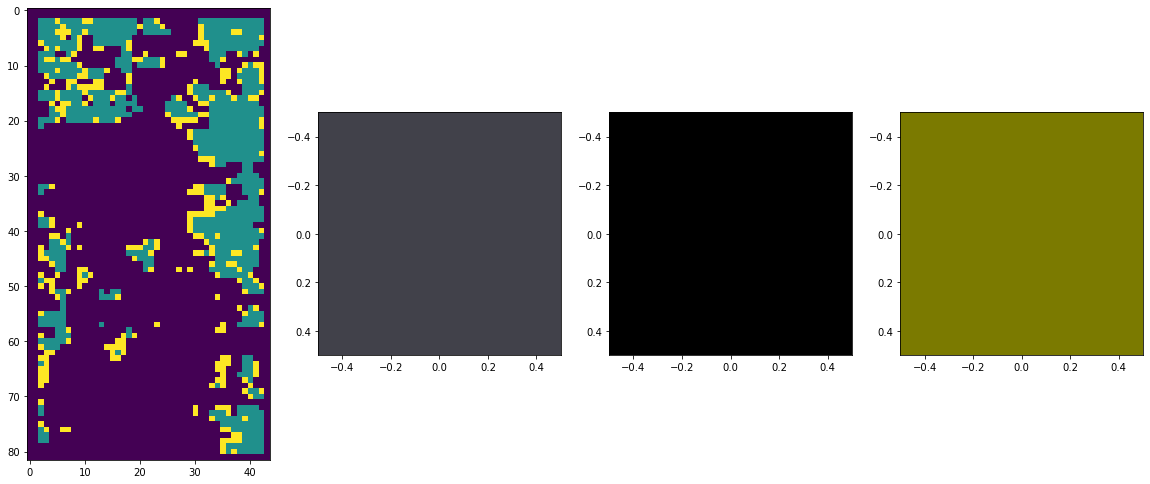

In [167]:
box_color=[]
for i in range(player_number):
    fig = plt.figure(figsize=(20,10))
    ax1 = fig.add_subplot(1,1,1)
    ax1.imshow(get_cropped_box(boxes_player[i]))
    box_color.append(get_clusters(boxes_player[i])[1])
    print(f"the dominant colors of image {i} {get_clusters(boxes_player[i])[1]}")
    show_clusters(i)
print(np.shape(box_color))
# clf = svm.SVC()
# clf.fit(np.array(box_color).flatten().reshape(player_number,6).transpose(), ["team a","team b","other"])
